<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/An-liseEstat-stica/blob/main/Trilha4/Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#library(readr)
#library(data.table)
#library(dplyr)
#library(ggplot2)
#library(ggpubr)

# PROBLEMA 1
# criando o data frame
x <- c(5.2,5.1,4.9,4.6,4.7,4.8,4.6,4.9)
y <- c(13,15,16,20,19,17,21,16)
dados <- data.frame(x,y)


In [7]:
# Primeiras analises
head(dados)
tail(dados)
summary(dados)
str(dados)

,x,y
,<dbl>,<dbl>
1,5.2,13
2,5.1,15
3,4.9,16
4,4.6,20
5,4.7,19
6,4.8,17


,x,y
,<dbl>,<dbl>
3,4.9,16
4,4.6,20
5,4.7,19
6,4.8,17
7,4.6,21
8,4.9,16


       x               y        
 Min.   :4.600   Min.   :13.00  
 1st Qu.:4.675   1st Qu.:15.75  
 Median :4.850   Median :16.50  
 Mean   :4.850   Mean   :17.12  
 3rd Qu.:4.950   3rd Qu.:19.25  
 Max.   :5.200   Max.   :21.00  

'data.frame':	8 obs. of  2 variables:
 $ x: num  5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9
 $ y: num  13 15 16 20 19 17 21 16


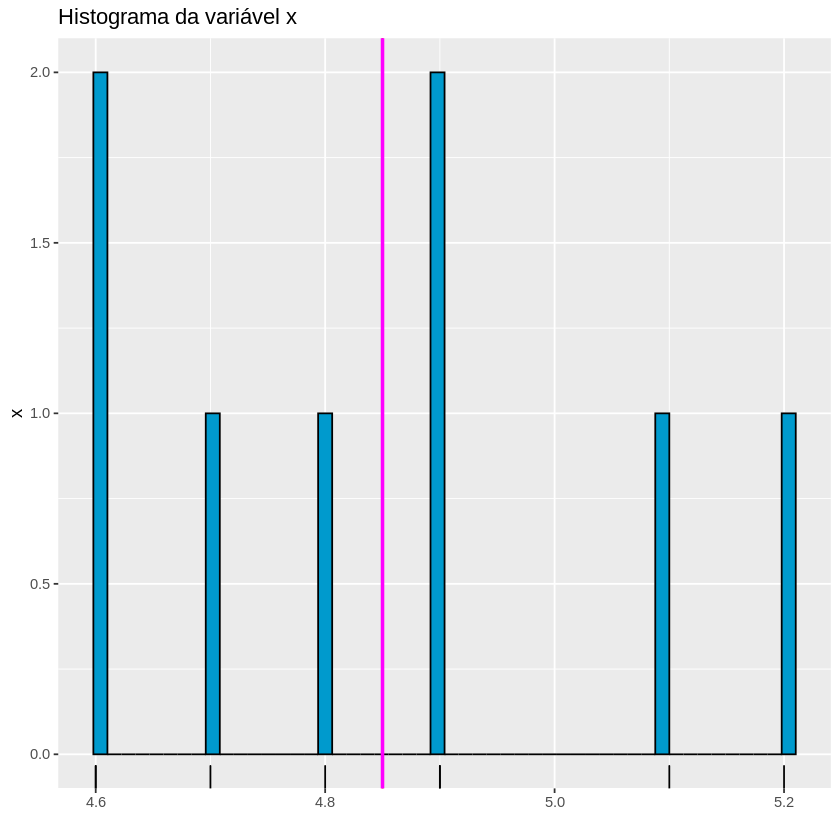

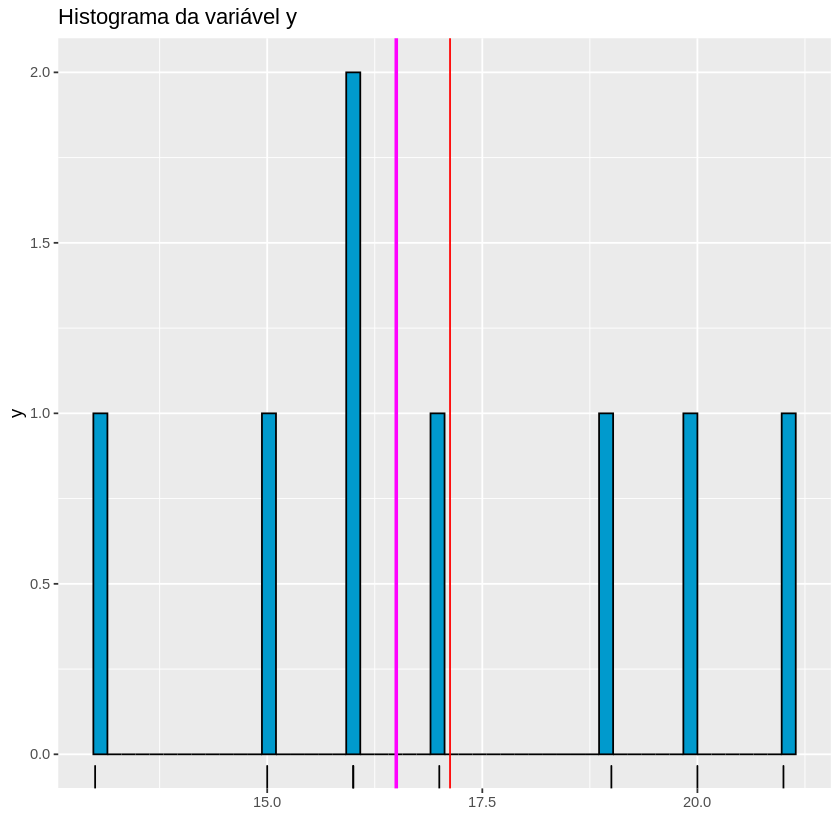

In [11]:
# construindo gráfico para ter uma noção inicial dos dados
# Grafico histograma
ggplot(data=dados) +
  geom_histogram(
    aes(x),bins = 50, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável x", y = "x",
         x = "") +
    geom_vline(xintercept = mean(dados$x), color = "red") +
    geom_rug(aes(x)) +
    geom_vline(xintercept = median(dados$x), color = "magenta", lwd = 1)

ggplot(data=dados) +
  geom_histogram(
    aes(y),bins = 50, fill = "deepskyblue3", color = "black") +
    labs(title = "Histograma da variável y", y = "y",
         x = "") +
    geom_vline(xintercept = mean(dados$y), color = "red") +
    geom_rug(aes(y)) +
    geom_vline(xintercept = median(dados$y), color = "magenta", lwd = 1)

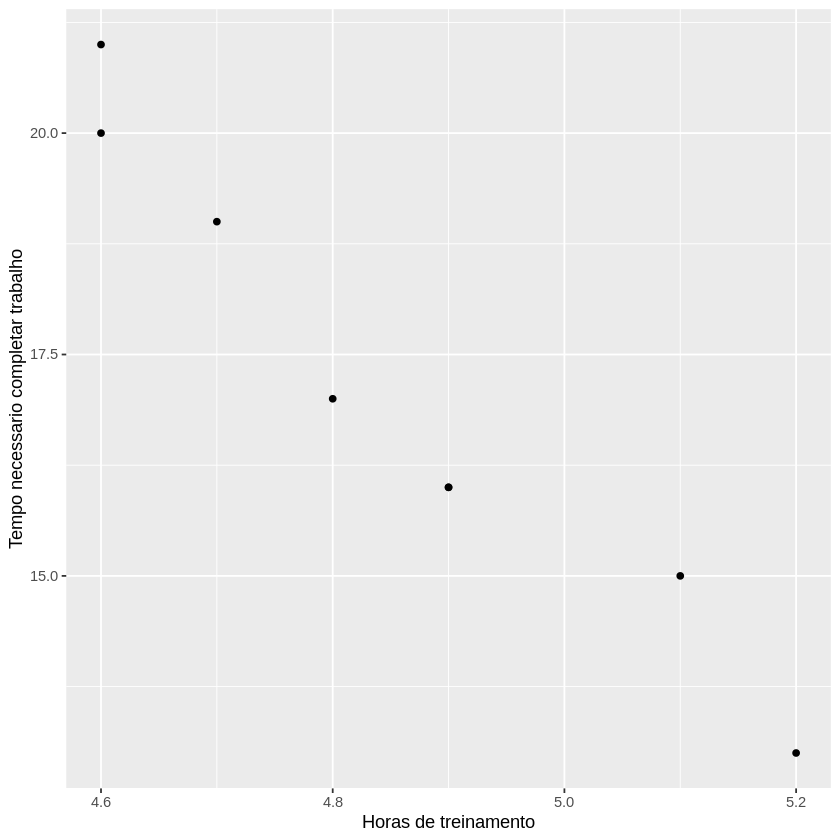

In [19]:
# Grafico de pontos - dispersao
ggplot(data=dados) +
  geom_point(
    aes(x = x, y = y)) +
    labs(y = "Tempo necessario completar trabalho",
         x = "Horas de treinamento", show.legend=TRUE) +
    geom_abline(slope=0, intercept=mean(dados$x), linetype = 2, color="red") 

`geom_smooth()` using formula 'y ~ x'



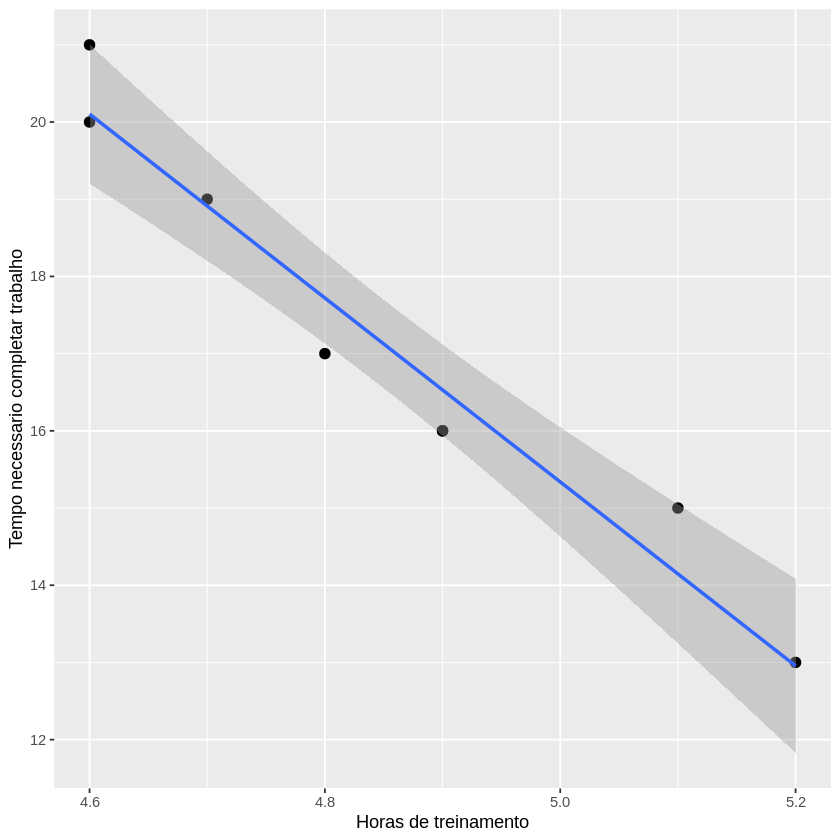

In [21]:
ggplot(data=dados, aes(x = x, y = y)) +
  geom_point(shape = 20, size = 4, color = "black") +
  geom_smooth(method = lm) +
    labs(y = "Tempo necessario completar trabalho",
         x = "Horas de treinamento", show.legend=TRUE) 

In [22]:
# Modelo Linear dos meus dados
mod_1 <- lm(y ~ x, data=dados)
mod_1
summary(mod_1)
anova(mod_1)


Call:
lm(formula = y ~ x, data = dados)

Coefficients:
(Intercept)            x  
      74.90       -11.91  



Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
x            -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,48.242647,48.2426471,109.9609,4.415513e-05
Residuals,6,2.632353,0.4387255,NA,NA


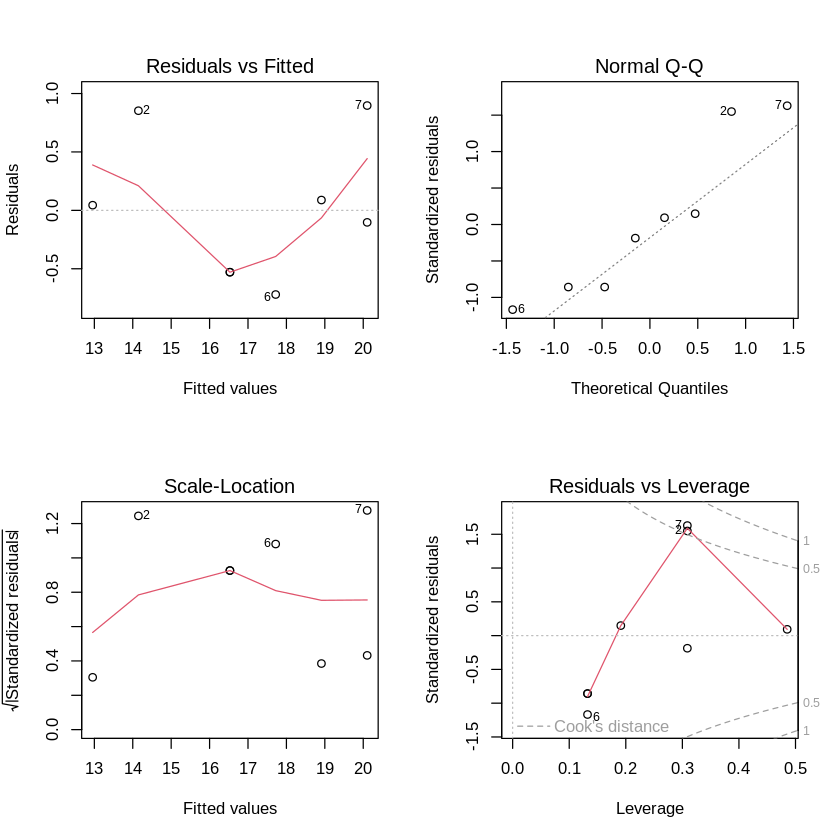

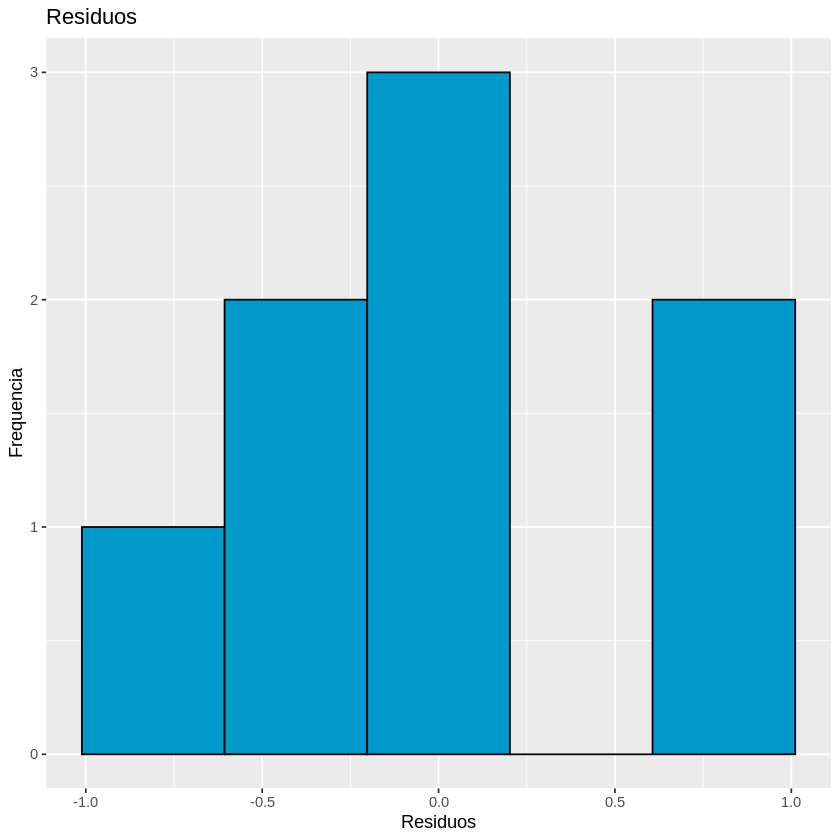

In [26]:
# grafico de residuos
par(mfrow=c(2,2))
plot(mod_1)

mod_1.df <- as.data.frame(residuals(mod_1))
names(mod_1.df) <- c("residuos")

ggplot(data=mod_1.df) +
  geom_histogram(
    aes(residuos),bins = 5, fill = "deepskyblue3", color = "black") +
    labs(title = "Residuos", y = "Frequencia",
         x = "Residuos") 

In [65]:
# PROBLEMA 2
# Importa dados 
#read_csv(examplecsv, col_types = cols(b = col_character()))
pib_gap_ini <- read.csv(file = 'pib_gapminder.csv')
head(pib_gap_ini)
tail(pib_gap_ini)

,pais,ano,pop,continente,expVida,pibPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


,pais,ano,pop,continente,expVida,pibPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1699,Zimbabwe,1982,7636524,Africa,60.363,788.8550
1700,Zimbabwe,1987,9216418,Africa,62.351,706.1573
1701,Zimbabwe,1992,10704340,Africa,60.377,693.4208
1702,Zimbabwe,1997,11404948,Africa,46.809,792.4500
1703,Zimbabwe,2002,11926563,Africa,39.989,672.0386
1704,Zimbabwe,2007,12311143,Africa,43.487,469.7093


In [66]:
summary(pib_gap_ini)
str(pib_gap_ini)

     pais                ano            pop             continente       
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  

'data.frame':	1704 obs. of  6 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


In [75]:
# transformando as colunas em ordered

pib_gap_ini <- transform(
  pib_gap_ini,pais = as.ordered(pais))
pib_gap <- transform(
  pib_gap_ini,continente = as.ordered(continente))
head(pib_gap)
tail(pib_gap)
summary(pib_gap)
str(pib_gap)


,pais,ano,pop,continente,expVida,pibPercap
,<ord>,<int>,<dbl>,<ord>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


,pais,ano,pop,continente,expVida,pibPercap
,<ord>,<int>,<dbl>,<ord>,<dbl>,<dbl>
1699,Zimbabwe,1982,7636524,Africa,60.363,788.8550
1700,Zimbabwe,1987,9216418,Africa,62.351,706.1573
1701,Zimbabwe,1992,10704340,Africa,60.377,693.4208
1702,Zimbabwe,1997,11404948,Africa,46.809,792.4500
1703,Zimbabwe,2002,11926563,Africa,39.989,672.0386
1704,Zimbabwe,2007,12311143,Africa,43.487,469.7093


          pais           ano            pop               continente 
 Afghanistan:  12   Min.   :1952   Min.   :6.001e+04   Africa  :624  
 Albania    :  12   1st Qu.:1966   1st Qu.:2.794e+06   Americas:300  
 Algeria    :  12   Median :1980   Median :7.024e+06   Asia    :396  
 Angola     :  12   Mean   :1980   Mean   :2.960e+07   Europe  :360  
 Argentina  :  12   3rd Qu.:1993   3rd Qu.:1.959e+07   Oceania : 24  
 Australia  :  12   Max.   :2007   Max.   :1.319e+09                 
 (Other)    :1632                                                    
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  
                                   

'data.frame':	1704 obs. of  6 variables:
 $ pais      : Ord.factor w/ 142 levels "Afghanistan"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: Ord.factor w/ 5 levels "Africa"<"Americas"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


In [79]:
#Faça uma tabela de frequência absoluta e uma tabela de frequência relativa para
#verificar o número de observações por continente

# Frequencia absoluta

freq_abs = table(pib_gap$continente) #salva frequência absoluta em freq_abs
freq_abs

total = sum(freq_abs) #soma os valores de freq_abs
total

freq_rel = freq_abs/total #frequência absoluta dividido pelo total é igual à frequência relativa
freq_rel

freq_abs_df <- data.frame(freq_abs)
colnames(freq_abs_df) <- c('Continente','Frequencia_Absoluta')

freq_rel_df <- data.frame(freq_rel)
colnames(freq_rel_df) <- c('Continente','Frequencia_Relativa')

freq_abs_df <- transform(
  freq_abs_df,Continente = as.ordered(Continente))

freq_rel_df <- transform(
  freq_rel_df,Continente = as.ordered(Continente))

head(freq_abs_df)
head(freq_rel_df)


  Africa Americas     Asia   Europe  Oceania 
     624      300      396      360       24 

[1] 1704


    Africa   Americas       Asia     Europe    Oceania 
0.36619718 0.17605634 0.23239437 0.21126761 0.01408451 

,Continente,Frequencia_Absoluta
,<ord>,<int>
1,Africa,624
2,Americas,300
3,Asia,396
4,Europe,360
5,Oceania,24


,Continente,Frequencia_Relativa
,<ord>,<dbl>
1,Africa,0.36619718
2,Americas,0.17605634
3,Asia,0.23239437
4,Europe,0.21126761
5,Oceania,0.01408451


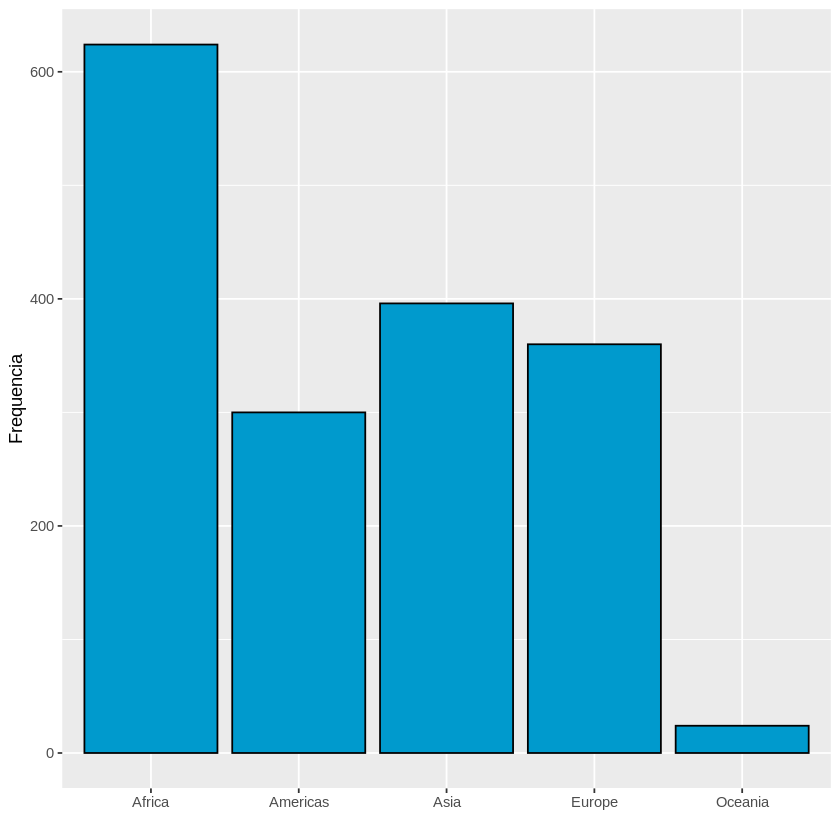

In [83]:
# Grafico de barras frequencia absoluta

ggplot(data=pib_gap) +
  geom_bar(
    aes(x = continente),fill = "deepskyblue3", color = "black") +
    labs(y = "Frequencia",
         x = "") 

Warning message:
“Use of `pib_gap$continente` is discouraged. Use `continente` instead.”


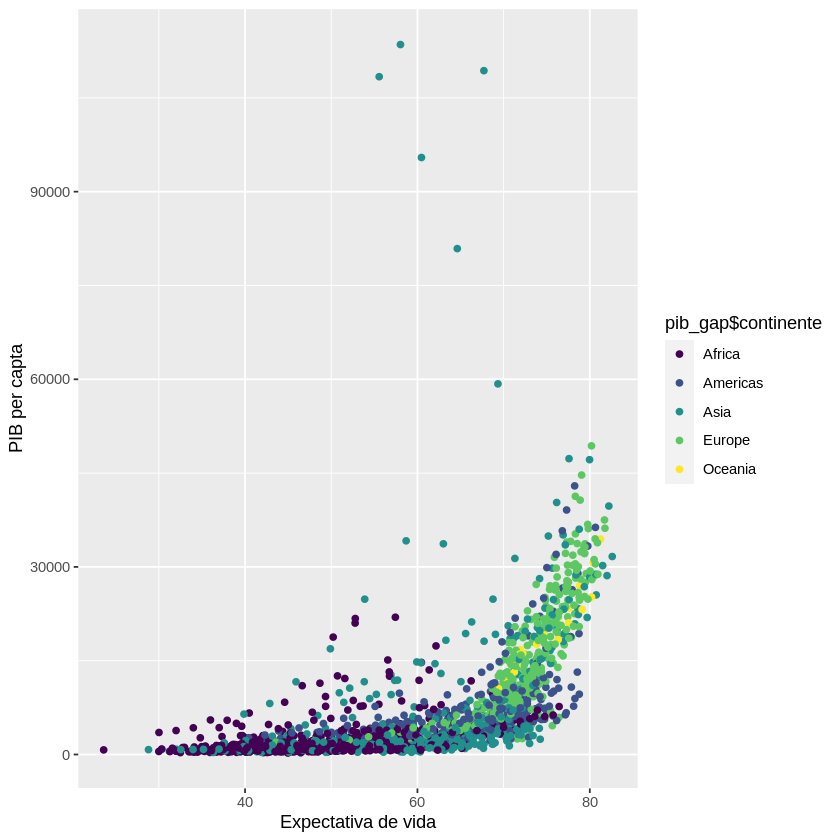

In [90]:
# dispersao com continente
ggplot(data=pib_gap) +
  geom_point(
    aes(x = expVida, y = pibPercap, color = pib_gap$continente)) +
    labs(y = "PIB per capta",
         x = "Expectativa de vida", show.legend=TRUE) 

In [89]:
# log das colunas
lpibPercap = log(pib_gap$pibPercap)
lexpVida = log(pib_gap$expVida)

pib_gap <- mutate(pib_gap, lpibPercap=lpibPercap)
pib_gap <- mutate(pib_gap, lexpVida=lexpVida)

head(pib_gap)
 

,pais,ano,pop,continente,expVida,pibPercap,lpibPercap,lexpVida
,<ord>,<int>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453,6.658583,3.360410
2,Afghanistan,1957,9240934,Asia,30.332,820.8530,6.710344,3.412203
3,Afghanistan,1962,10267083,Asia,31.997,853.1007,6.748878,3.465642
4,Afghanistan,1967,11537966,Asia,34.020,836.1971,6.728864,3.526949
5,Afghanistan,1972,13079460,Asia,36.088,739.9811,6.606625,3.585960
6,Afghanistan,1977,14880372,Asia,38.438,786.1134,6.667101,3.649047


Warning message:
“Use of `pib_gap$continente` is discouraged. Use `continente` instead.”


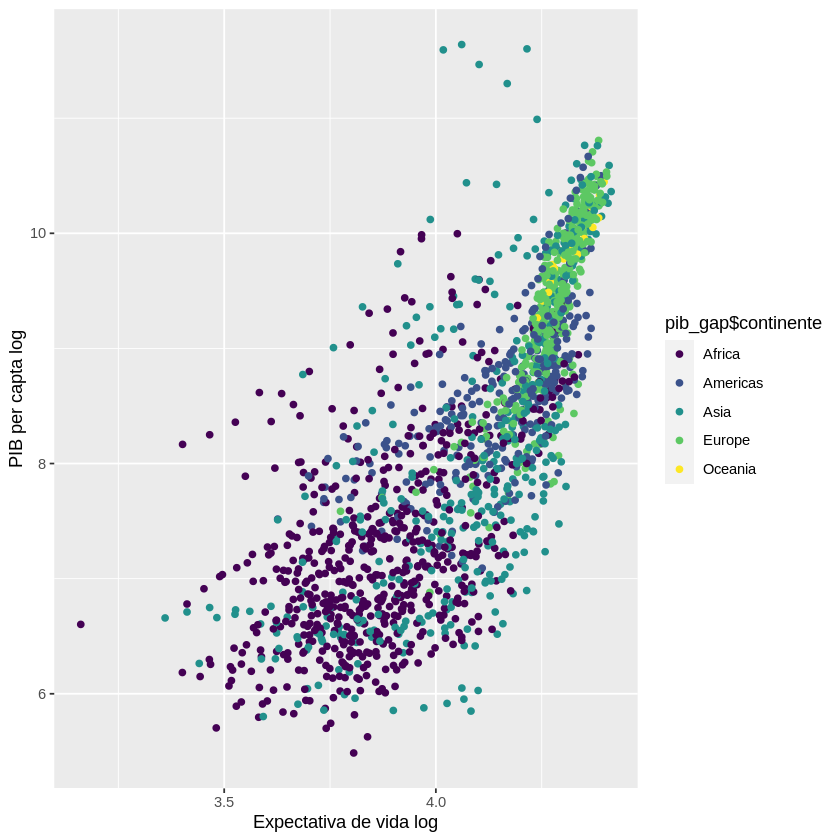

In [92]:
# dispersao com continente com log
ggplot(data=pib_gap) +
  geom_point(
    aes(x = lexpVida, y = lpibPercap, color = pib_gap$continente)) +
    labs(y = "PIB per capta log",
         x = "Expectativa de vida log", show.legend=TRUE) 

In [93]:
# Modelo Linear dos meus dados novos
mod_pib <- lm(lexpVida ~ lpibPercap, data=pib_gap)
mod_pib
summary(mod_pib)
anova(mod_pib)


Call:
lm(formula = lexpVida ~ lpibPercap, data = pib_gap)

Coefficients:
(Intercept)   lpibPercap  
     2.8642       0.1465  



Call:
lm(formula = lexpVida ~ lpibPercap, data = pib_gap)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67059 -0.06453  0.01978  0.09086  0.36156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.864177   0.023283  123.02   <2e-16 ***
lpibPercap  0.146549   0.002821   51.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1445 on 1702 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.613 
F-statistic:  2698 on 1 and 1702 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lpibPercap,1,56.34280,56.34280459,2698.233,0
Residuals,1702,35.54009,0.02088137,NA,NA


`geom_smooth()` using formula 'y ~ x'



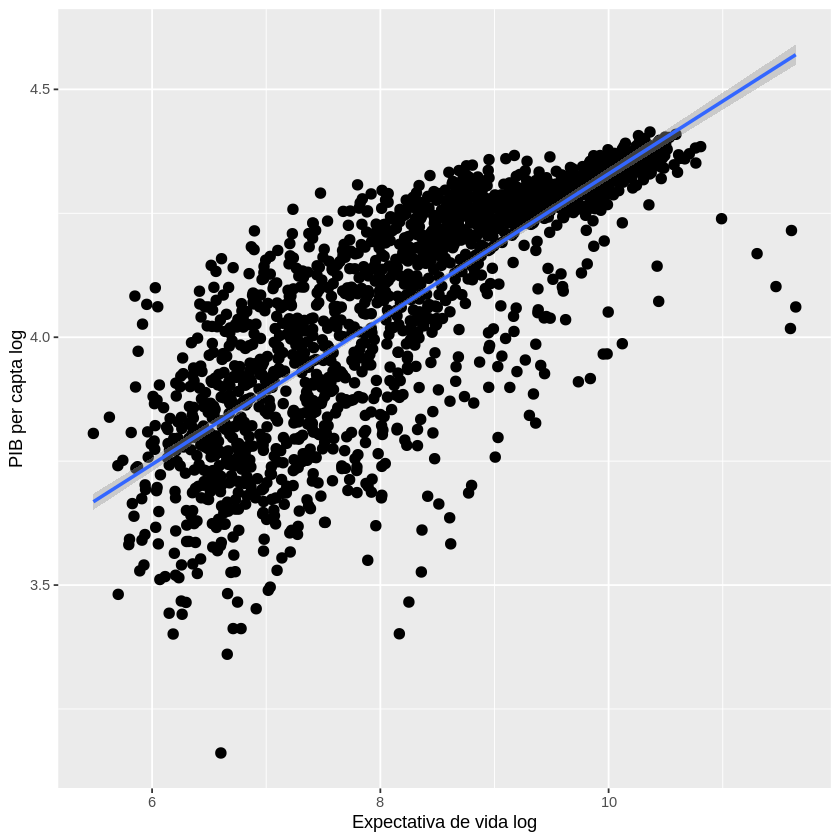

In [94]:
ggplot(data=mod_pib, aes(x = lpibPercap, y = lexpVida)) +
  geom_point(shape = 20, size = 4, color = "black") +
  geom_smooth(method = lm) +
    labs(y = "PIB per capta log",
         x = "Expectativa de vida log", show.legend=TRUE)

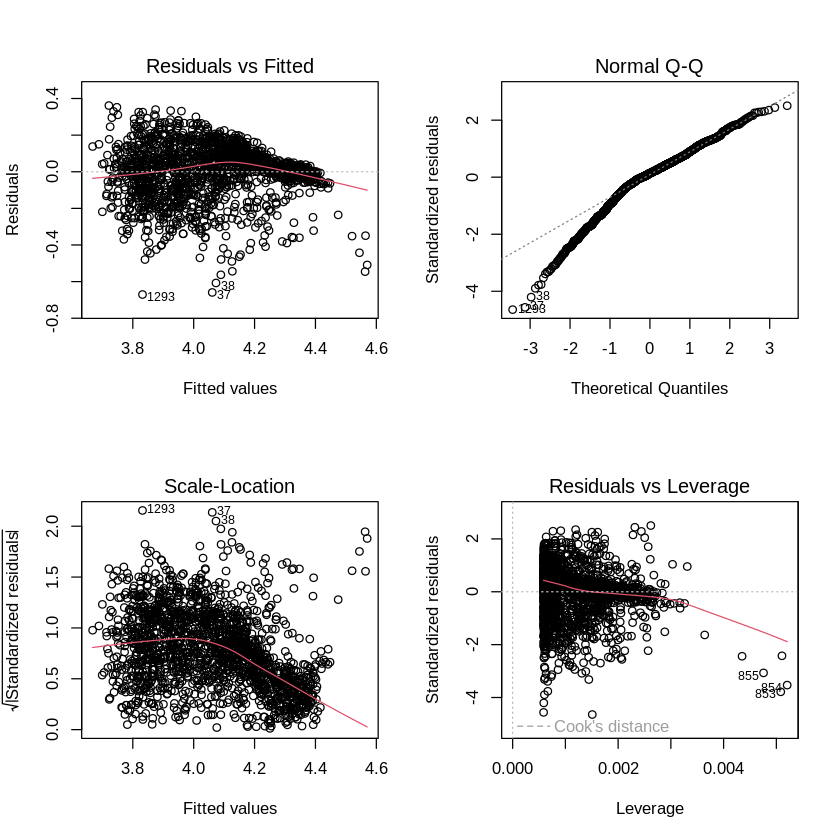

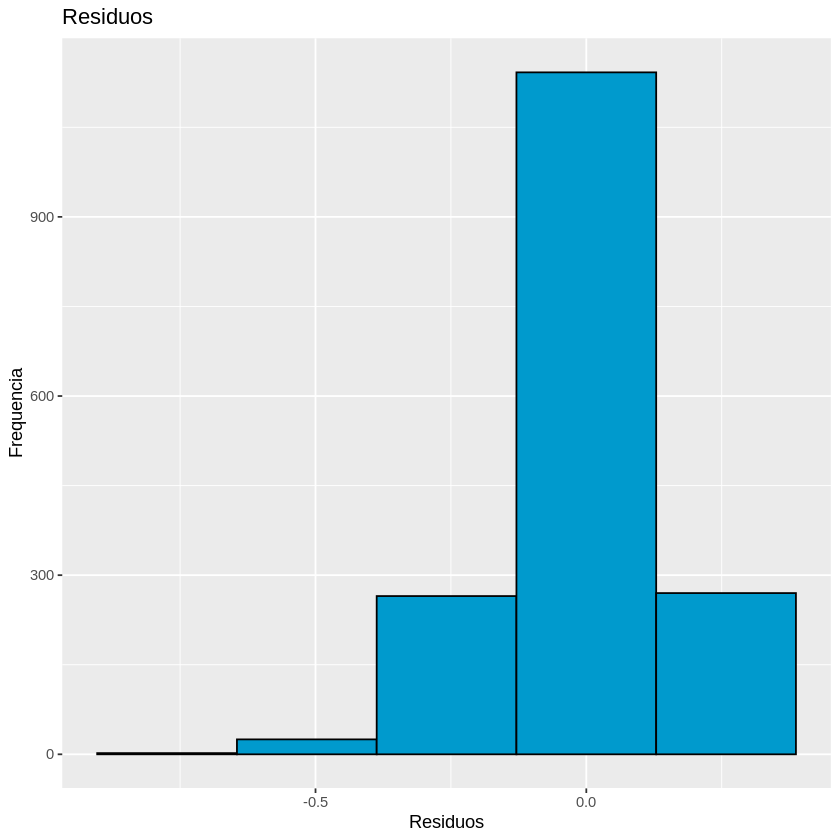

In [95]:
# grafico de residuos
par(mfrow=c(2,2))
plot(mod_pib)

mod_pib.df <- as.data.frame(residuals(mod_pib))
names(mod_pib.df) <- c("residuos")

ggplot(data=mod_pib.df) +
  geom_histogram(
    aes(residuos),bins = 5, fill = "deepskyblue3", color = "black") +
    labs(title = "Residuos", y = "Frequencia",
         x = "Residuos") 

In [112]:
# PROBLEMA 3
# Importa dados 

autos_imp <- read.csv(file = 'autos.csv',sep = ';')

autos_imp <- transform(
  autos_imp,make = as.ordered(make))
autos_imp <- transform(
  autos_imp,fuel.type = as.ordered(fuel.type))
autos_imp <- transform(
  autos_imp,aspiration = as.ordered(aspiration))
autos_imp <- transform(
  autos_imp,body.style = as.ordered(body.style))
autos_imp <- transform(
  autos_imp,drive.wheels = as.ordered(drive.wheels))
autos_imp <- transform(
  autos_imp,engine.location = as.ordered(engine.location))
autos_imp$wheel.base <- as.double(gsub(",","",autos_imp$wheel.base))
autos_imp$length <- as.double(gsub(",","",autos_imp$length))
autos_imp$width <- as.double(gsub(",","",autos_imp$width))
autos_imp$height <- as.double(gsub(",","",autos_imp$height))
autos_imp <- transform(
  autos_imp,engine.type = as.ordered(engine.type))
autos_imp <- transform(
  autos_imp,fuel.system = as.ordered(fuel.system))
autos_imp <- transform(
  autos_imp,bore = as.ordered(bore))
autos_imp <- transform(
  autos_imp,stroke = as.ordered(stroke))
autos_imp <- transform(
  autos_imp,compression.ratio = as.ordered(compression.ratio))

head(autos_imp)
tail(autos_imp)
summary(autos_imp)
str(autos_imp)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<ord>,<ord>,<ord>,<int>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,⋯,<int>,<ord>,<ord>,<ord>,<ord>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,886,1688,641,⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,886,1688,641,⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,945,1712,655,⋯,152,mpfi,"2,68","3,47",9,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,998,1766,662,⋯,109,mpfi,"3,19","3,4",10,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,994,1766,664,⋯,136,mpfi,"3,19","3,4",8,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,998,1773,663,⋯,136,mpfi,"3,19","3,4","8,5",110,5500,19,25,15250


,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<ord>,<ord>,<ord>,<int>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,⋯,<int>,<ord>,<ord>,<ord>,<ord>,<int>,<int>,<int>,<int>,<int>
188,volvo,gas,turbo,4,wagon,rwd,front,1043,1888,672,⋯,130,mpfi,"3,62","3,15","7,5",162,5100,17,22,18950
189,volvo,gas,std,4,sedan,rwd,front,1091,1888,689,⋯,141,mpfi,"3,78","3,15","9,5",114,5400,23,28,16845
190,volvo,gas,turbo,4,sedan,rwd,front,1091,1888,688,⋯,141,mpfi,"3,78","3,15","8,7",160,5300,19,25,19045
191,volvo,gas,std,4,sedan,rwd,front,1091,1888,689,⋯,173,mpfi,"3,58","2,87","8,8",134,5500,18,23,21485
192,volvo,diesel,turbo,4,sedan,rwd,front,1091,1888,689,⋯,145,idi,"3,01","3,4",23,106,4800,26,27,22470
193,volvo,gas,turbo,4,sedan,rwd,front,1091,1888,689,⋯,141,mpfi,"3,78","3,15","9,5",114,5400,19,25,22625


         make     fuel.type   aspiration    num.doors           body.style
 toyota    :32   diesel: 19   std  :158   Min.   :2.000   convertible: 6  
 nissan    :18   gas   :174   turbo: 35   1st Qu.:2.000   hardtop    : 8  
 honda     :13                            Median :4.000   hatchback  :63  
 mitsubishi:13                            Mean   :3.161   sedan      :92  
 mazda     :12                            3rd Qu.:4.000   wagon      :24  
 subaru    :12                            Max.   :4.000                   
 (Other)   :93                                                            
 drive.wheels engine.location   wheel.base         length         width      
 4wd:  8      front:190       Min.   :  93.0   Min.   : 150   Min.   : 64.0  
 fwd:114      rear :  3       1st Qu.: 937.0   1st Qu.:1653   1st Qu.:638.0  
 rwd: 71                      Median : 965.0   Median :1724   Median :654.0  
                              Mean   : 921.4   Mean   :1623   Mean   :613.4  
          

'data.frame':	193 obs. of  24 variables:
 $ make             : Ord.factor w/ 21 levels "alfa-romero"<..: 1 1 1 2 2 2 2 2 2 3 ...
 $ fuel.type        : Ord.factor w/ 2 levels "diesel"<"gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration       : Ord.factor w/ 2 levels "std"<"turbo": 1 1 1 1 1 1 1 1 2 1 ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : Ord.factor w/ 5 levels "convertible"<..: 1 1 3 4 4 4 4 5 4 4 ...
 $ drive.wheels     : Ord.factor w/ 3 levels "4wd"<"fwd"<"rwd": 3 3 3 2 1 2 2 2 2 3 ...
 $ engine.location  : Ord.factor w/ 2 levels "front"<"rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheel.base       : num  886 886 945 998 994 ...
 $ length           : num  1688 1688 1712 1766 1766 ...
 $ width            : num  641 641 655 662 664 663 714 714 714 648 ...
 $ height           : num  488 488 524 543 543 531 557 557 559 543 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : Ord.factor w/ 5 levels "dohc"<"l"<"ohc"